# Multiple Linear Regression

## Bike Sharing Assignment 

### Problem Statement UNDERSTANDING:

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [5]:
# Read the given CSV file, and view some sample records
boombike = pd.read_csv('day.csv')

In [6]:
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
boombike.shape

(730, 16)

#### Note: 
The dataframe has 730 rows and 16 columns


In [8]:
boombike.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

### 1.5 Removing Redundant columns

In [9]:
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<function matplotlib.pyplot.show(close=None, block=None)>

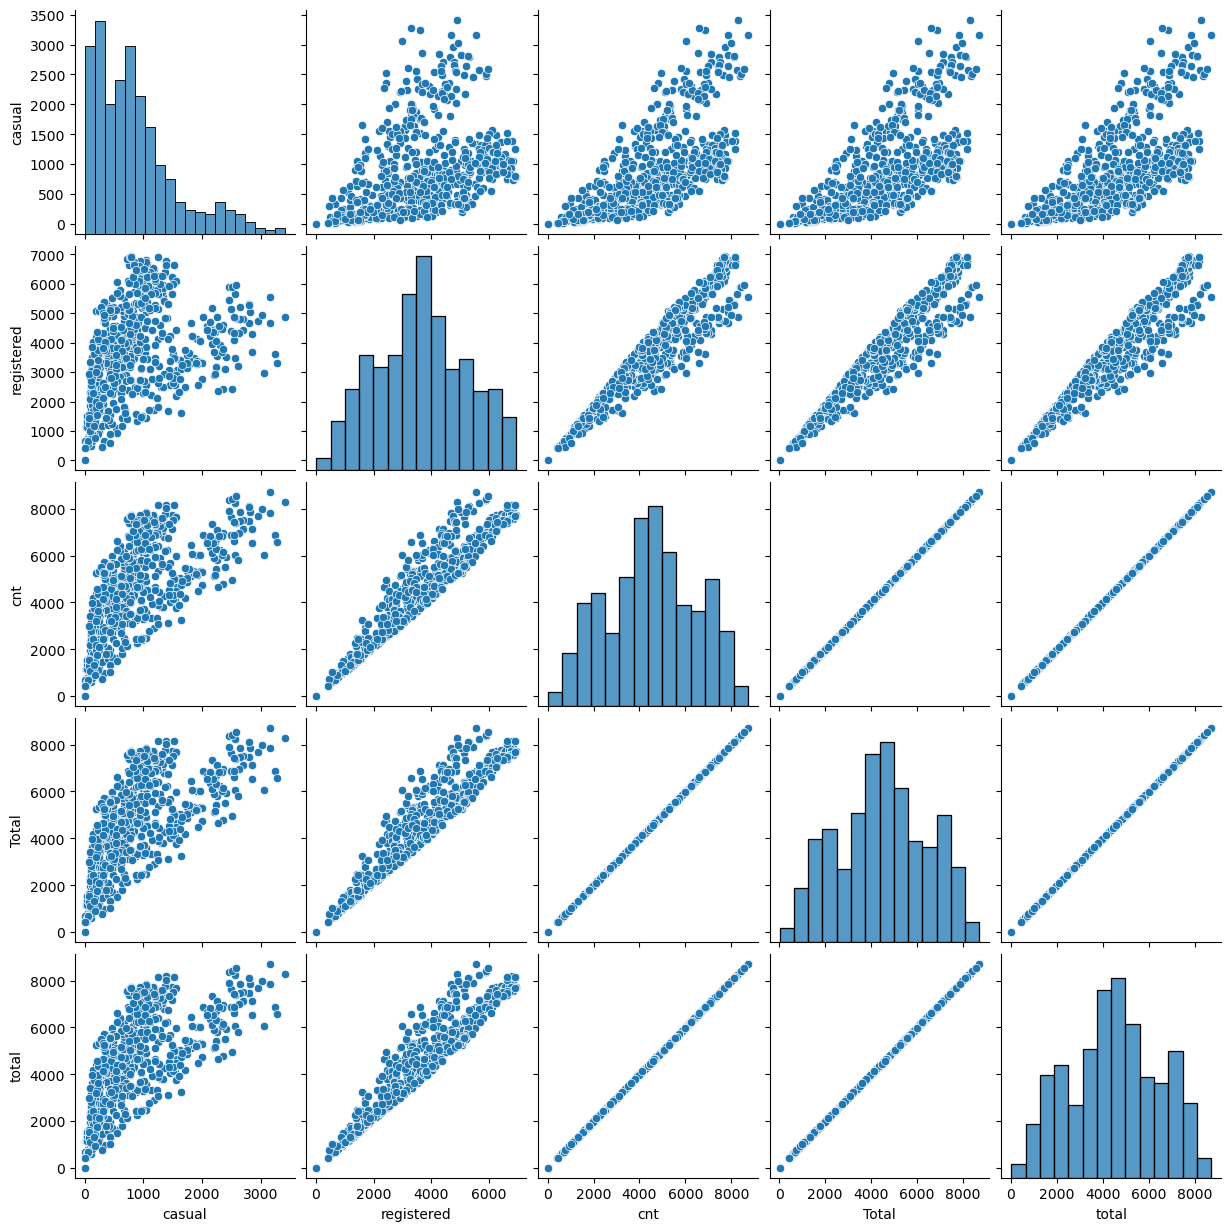

In [10]:

bike_cnt=boombike[['casual','registered','cnt']]
bike_cnt['Total'] = bike_cnt['casual']+bike_cnt['registered']
# Creating a column whch will show the value of casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show

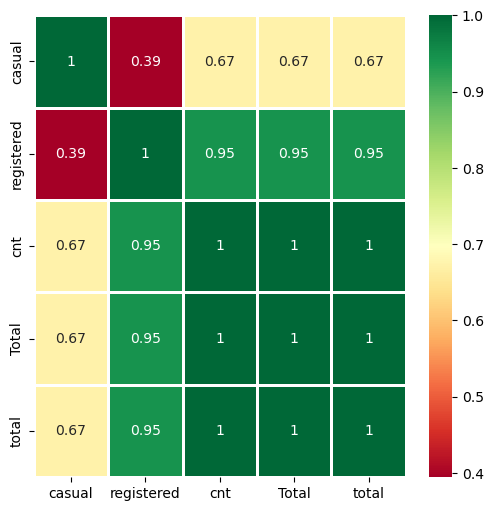

In [11]:
# also checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

Note:
Based on the high level analysis of the data and the data dictionary, the following variables can be removed from further analysis -

- instant: It is only an index value
- dteday: This has the date, Since we already have separate columns for 'year' & 'month' we could live without this column
- casual & registered: Both these columns contains the count of bike booked by different categories of customers. From the pairplot as well as the correlation heatmap, we can concur that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [12]:
#dropping the unwanted columns
drop_col = ['instant', 'dteday','casual','registered']
for i in boombike.columns:
    if i in drop_col:
        boombike.drop(labels= i, axis= 1, inplace= True)
#Inspecting dataframe
boombike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
boombike.shape

(730, 12)

## Step 2: Encoding & Visualizing the data

### Feature Understanding

- instant: record index This column acts just as serieal number and is thus redundant. it will be dropped in next step.
- dteday : date as in data we have been given the day of week, month, year, holiday data in seperate columns. so I will dropped the next step.
	- season : season (1:spring, 2:summer, 3:fall, 4:winter) This feature will be converted to season names so that proper dumies can be created.
	- yr : year (0: 2018, 1:2019) this column signifies the boolean form as inicated.
	- mnth : month ( 1 to 12) this feature will be converted into month name so that proper dumies can be created.
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) this is a binary variable
	- weekday : day of the week This feature will be converted to weekday names so that proper dumies can be created.
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. This variable is an extract of holiday and weekday. during the course of assignment, post visualization, reasearcher will decide on transforming this column further if required.
	+ weathersit : This feature will be converted to weathersit names so that proper dumies can be created.
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- cnt: count of total rental (casual + registered) bikes including both casual and registered (This Target Variable)

In [14]:
# Transformin weathersit feature:
boombike['weathersit'] = boombike['weathersit'].map({1: 'clear to Partly Cloudy',2: 'Mistly and Cloudy', 3:'Light Rain or Snow',4:'Heavy Rain or Snow'})

# Transformin season feature:
boombike['season']= boombike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

# Transformin Months feature:
boombike['mnth'] = boombike['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Transformin Weekdays feature:
boombike['weekday'] = boombike['weekday'].map({0:'sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})


# Re - obersving The dataset
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mistly and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,Mistly and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


### 2.2 Categorical Variable Analysis

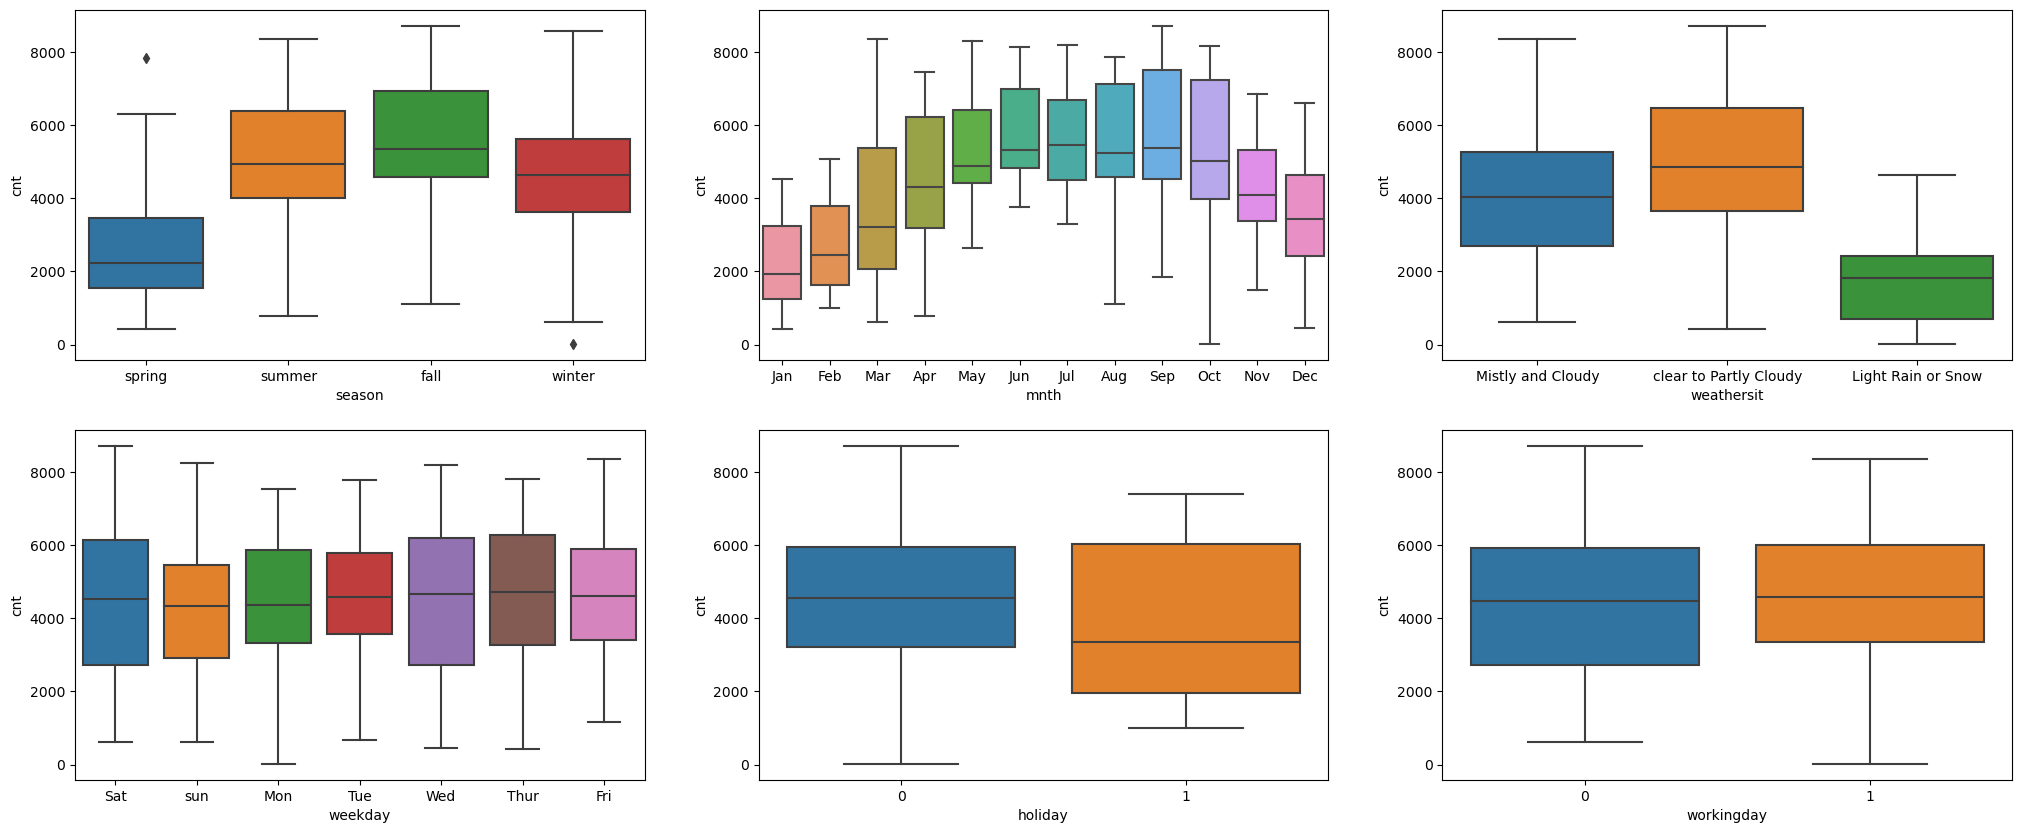

In [15]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombike)
plt.show()

In [16]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = boombike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/boombike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/boombike.cnt.count()*100
    return round(cat_df,2)

In [17]:
# Function to generate plots related to Categorical Variables
def categorical_plot(col, x, y):
    plt.figure(figsize=(x, y))
    plt.subplot(1, 2, 1)
    sns.barplot(x=col, y='cnt', data=boombike)
    plt.subplot(1, 2, 2)
    sns.barplot(x=col, y='cnt', data=boombike, hue='yr', palette='Paired')
    plt.legend(labels=['2018', '2019'])
    plt.show()

#### 2.2.1 Season :

In [18]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
fall,1061129,5644.30,188,32.24,25.75
summer,918589,4992.33,184,27.91,25.21
winter,841613,4728.16,178,25.57,24.38
spring,469514,2608.41,180,14.27,24.66


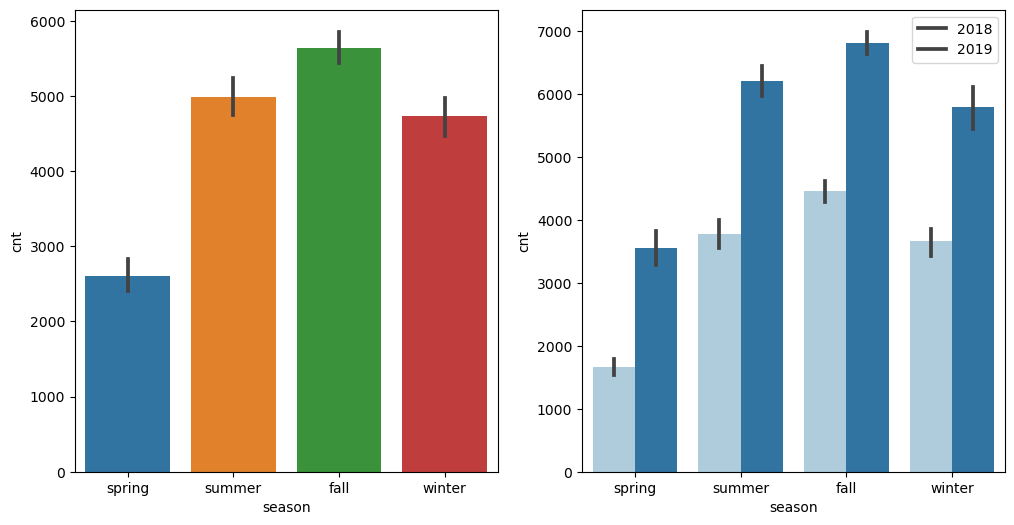

In [19]:
categorical_plot('season',12,6)


#### Obeservestions
Almost 32% of the bike booking were happening in Fall with a median of over 5000 bookings (for two years). It is followed by Summer & Winter with 27% & 25% of total booking. It indicates that the season can be a good predictor of the dependent variable.

#### 2.2.2 Month :


In [20]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


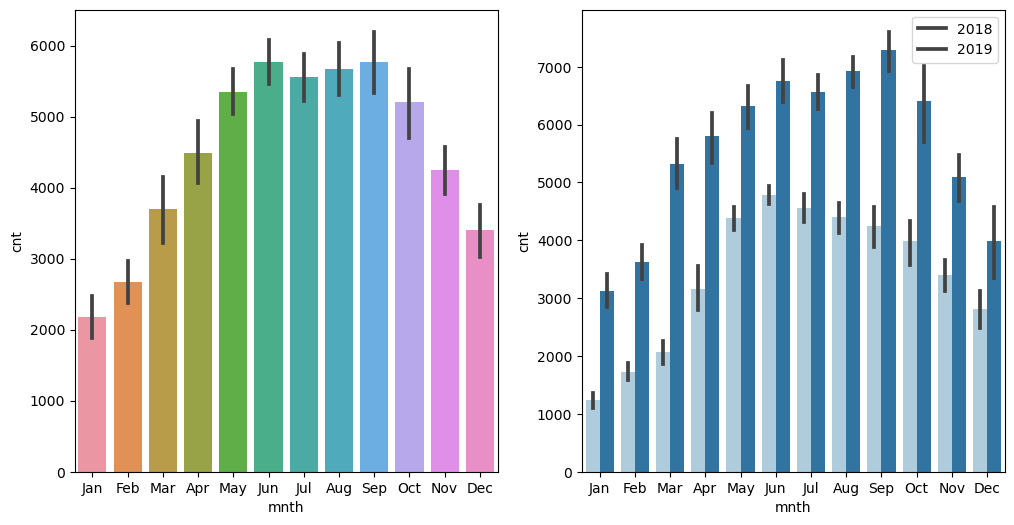

In [21]:
categorical_plot('mnth',12,6)


#### Obeservestions:
Almost 10% of the bike booking was happening in the months' May to Sep with a median of over 4000 bookings per month. It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.

In [22]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
clear to Partly Cloudy,2257952,4876.79,463,68.61,63.42
Mistly and Cloudy,995024,4044.81,246,30.24,33.70
Light Rain or Snow,37869,1803.29,21,1.15,2.88


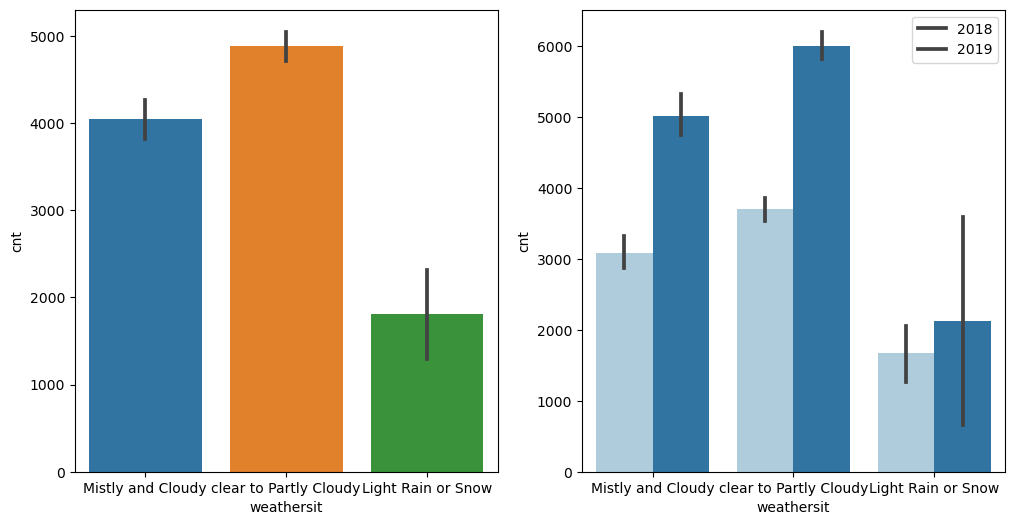

In [23]:
categorical_plot('weathersit',12,6)

#### Obeservestions:

Almost 68.6% of the bike booking was happening during Clear weather with a median of close to 5000 bookings (for two years). This was followed by Misty with 30% of the total booking. It indicates that the weathersit does show some trend towards the bike bookings, and it can be a good predictor for the dependent variable. The current data frame does not have any data where the weather is Heavy_RainSnow

#### 2.2.4 Weekday :

In [24]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Fri,487790,4690.29,104,14.82,14.25
Thur,485395,4667.26,104,14.75,14.25
Sat,477807,4550.54,105,14.52,14.38
Wed,471214,4574.89,103,14.32,14.11
Tue,469109,4510.66,104,14.25,14.25
Mon,455503,4338.12,105,13.84,14.38
sun,444027,4228.83,105,13.49,14.38


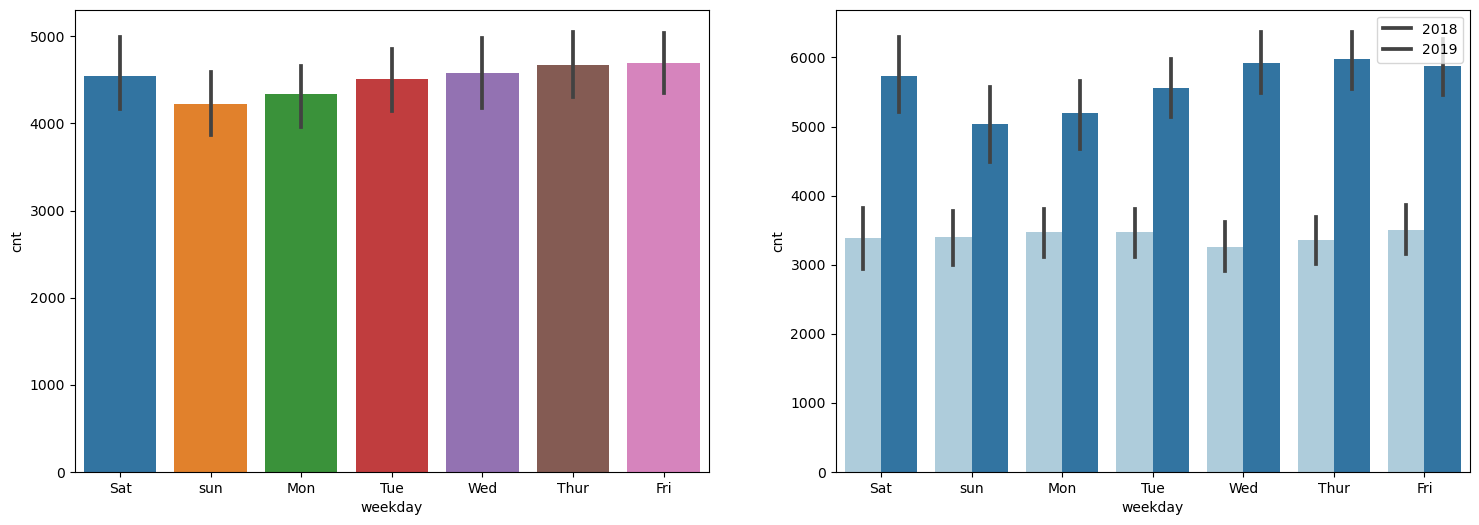

In [25]:
categorical_plot('weekday',18,6)

#### Obesevestion:
weekday variable shows the very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence on the predictor. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection

#### 2.2.5 Holiday :


In [26]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


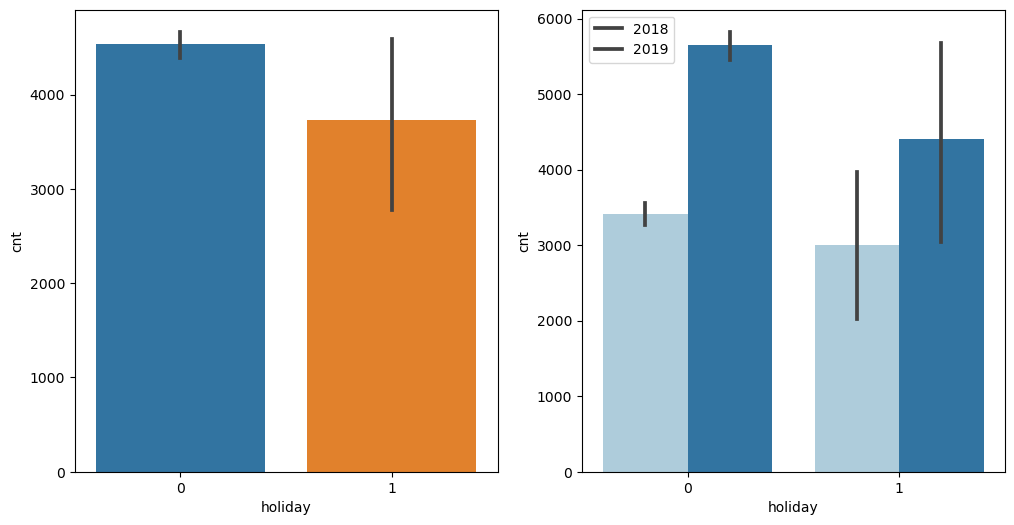

In [27]:
categorical_plot('holiday',12,6)

#### Obesevestion:
Almost 97% of bike rentals are happening during non-holiday time.

In [28]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


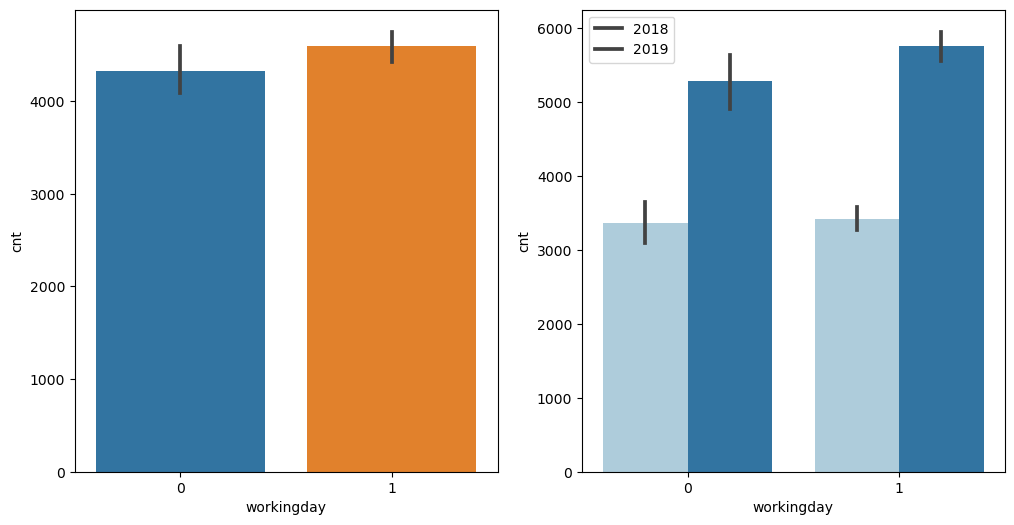

In [29]:
categorical_plot('workingday',12,6)

#### Obeservations:
Almost 69% of the bike booking were happening in 'workingday' with a median of close to 5000 bookings (for two years). It indicates that the workingday can be a good predictor of the dependent variable

#### 2.2.7 Year :

In [30]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


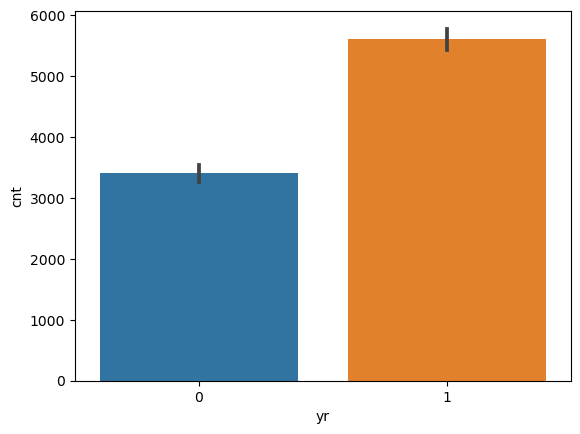

In [31]:
sns.barplot(x='yr', y='cnt', data=boombike)
plt.show()

#### Obersvations:
Bike rental demand has gone up from 2018 to 2019

#### 2.3 Numerical Variable Analysis

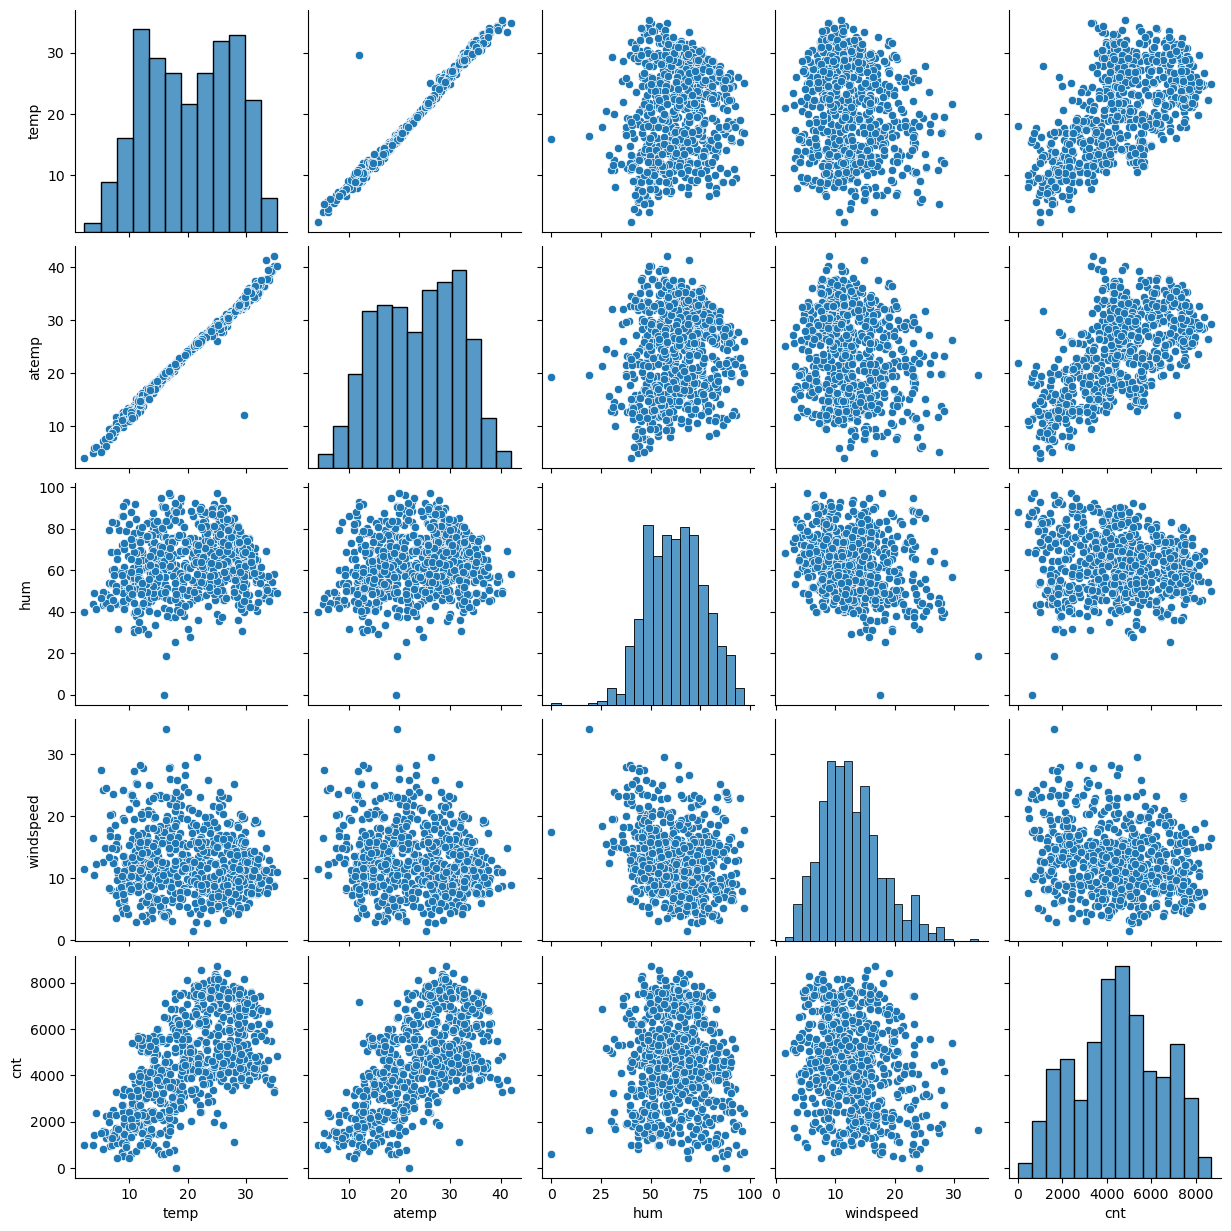

In [32]:
#Generating pairplot to check the relationships between numeric variables variables
bike_num = boombike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

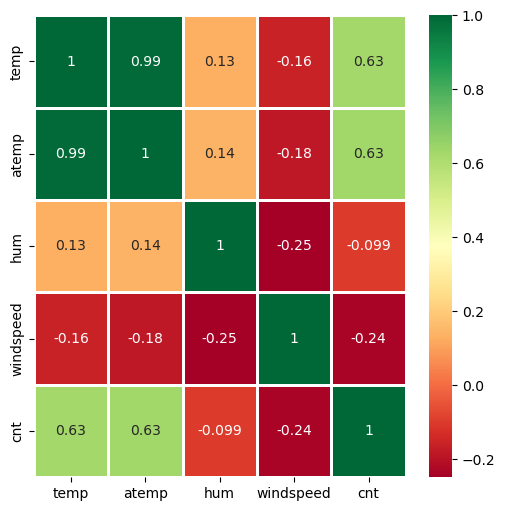

In [33]:
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

#### Observations
 There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

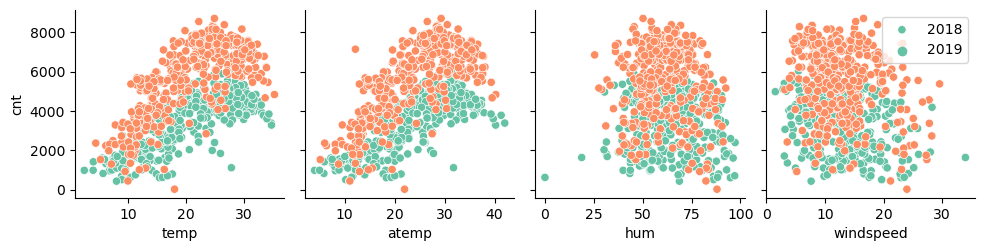

In [34]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=boombike, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

#### Observations:
All the parameters have increased values in 2019 compared to 2018. Thus, year may become a key paratemeter in the model

## Step 3: Data Preparation

### 3.1 Dummy Variable Creation

#### Season

In [35]:
seasons = pd.get_dummies(boombike['season'], drop_first = True)
seasons.head(3)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0


#### Weather

In [36]:
weather= pd.get_dummies(boombike['weathersit'], drop_first = True)
weather.head(3)

,Mistly and Cloudy,clear to Partly Cloudy
0,1,0
1,1,0
2,0,1


#### Month

In [37]:
Month= pd.get_dummies(boombike['mnth'], drop_first= True)
Month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


#### Weekday

In [38]:
weekday=pd.get_dummies(boombike['weekday'], drop_first= True)
weekday.head(3)

,Mon,Sat,Thur,Tue,Wed,sun
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0


### 3.2 Merging the Dataframes

In [39]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bike_new= pd.concat([boombike,seasons,weather,Month,weekday], axis=1)
bike_new.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Thur,Tue,Wed,sun
0,spring,0,Jan,0,Sat,0,Mistly and Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,sun,0,Mistly and Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,clear to Partly Cloudy,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear to Partly Cloudy,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,clear to Partly Cloudy,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0


In [40]:
bike_new.shape

(730, 34)

In [41]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  730 non-null    object 
 1   yr                      730 non-null    int64  
 2   mnth                    730 non-null    object 
 3   holiday                 730 non-null    int64  
 4   weekday                 730 non-null    object 
 5   workingday              730 non-null    int64  
 6   weathersit              730 non-null    object 
 7   temp                    730 non-null    float64
 8   atemp                   730 non-null    float64
 9   hum                     730 non-null    float64
 10  windspeed               730 non-null    float64
 11  cnt                     730 non-null    int64  
 12  spring                  730 non-null    uint8  
 13  summer                  730 non-null    uint8  
 14  winter                  730 non-null    ui

In [42]:
bike_new.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)
bike_new.shape

(730, 30)

In [43]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   spring                  730 non-null    uint8  
 9   summer                  730 non-null    uint8  
 10  winter                  730 non-null    uint8  
 11  Mistly and Cloudy       730 non-null    uint8  
 12  clear to Partly Cloudy  730 non-null    uint8  
 13  Aug                     730 non-null    uint8  
 14  Dec                     730 non-null    ui

#### Obersvations:
All the 30 columns are now as numeric value. The dataframe is ready now for splitting into Train & Test dataframes

## Step 4: Splitting the data into Train & Test Dataset

### 4.1. Train & Test Split

In [44]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size=0.7, random_state= 333)

In [45]:
#Verifying the train - test split and new dataframe details
print('Bike Train',bike_train.shape)
print('Bike Test',bike_test.shape)

Bike Train (510, 30)
Bike Test (220, 30)


In [46]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Thur,Tue,Wed,sun
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,20.218078,23.590696,62.340743,12.771365,4494.103922,0.250980,0.245098,...,0.092157,0.086275,0.084314,0.082353,0.139216,0.150980,0.129412,0.141176,0.150980,0.141176
std,0.500487,0.151726,0.465245,7.500110,8.138271,14.418728,5.205888,1948.315655,0.434003,0.430568,...,0.289531,0.281045,0.278131,0.275172,0.346511,0.358381,0.335985,0.348545,0.358381,0.348545
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.958300,15.624869,5962.750000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Thur,Tue,Wed,sun
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,20.553817,24.040727,63.749086,12.745665,4540.236364,0.236364,0.268182,...,0.068182,0.072727,0.086364,0.081818,0.154545,0.127273,0.172727,0.145455,0.118182,0.150000
std,0.501120,0.198531,0.466833,7.533926,8.188064,13.790510,5.184271,1911.199159,0.425817,0.444023,...,0.252632,0.260281,0.281541,0.274713,0.362295,0.334038,0.378873,0.353363,0.323559,0.357886
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Oberservations:
Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 220 in test dataset

### 4.2 Rescalling bike_train dataframe

In [48]:
# Rescaling using MinMaxScaler
scaler= MinMaxScaler()

In [49]:
#Dataframe before scaling 
bike_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Thur,Tue,Wed,sun
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,1,0,0,1,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,0,0,0,1
502,1,0,1,23.130847,27.55605,52.3333,9.166739,7639,0,1,...,1,0,0,0,0,0,0,0,0,0


In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars= ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [51]:
#Checking after rescalling
bike_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Thur,Tue,Wed,sun
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,1,0,0,1,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,0,1
502,1,0,1,0.629300,0.619631,0.543723,0.235894,0.876323,0,1,...,1,0,0,0,0,0,0,0,0,0


### 4.3 Checking Correlation Coefficient

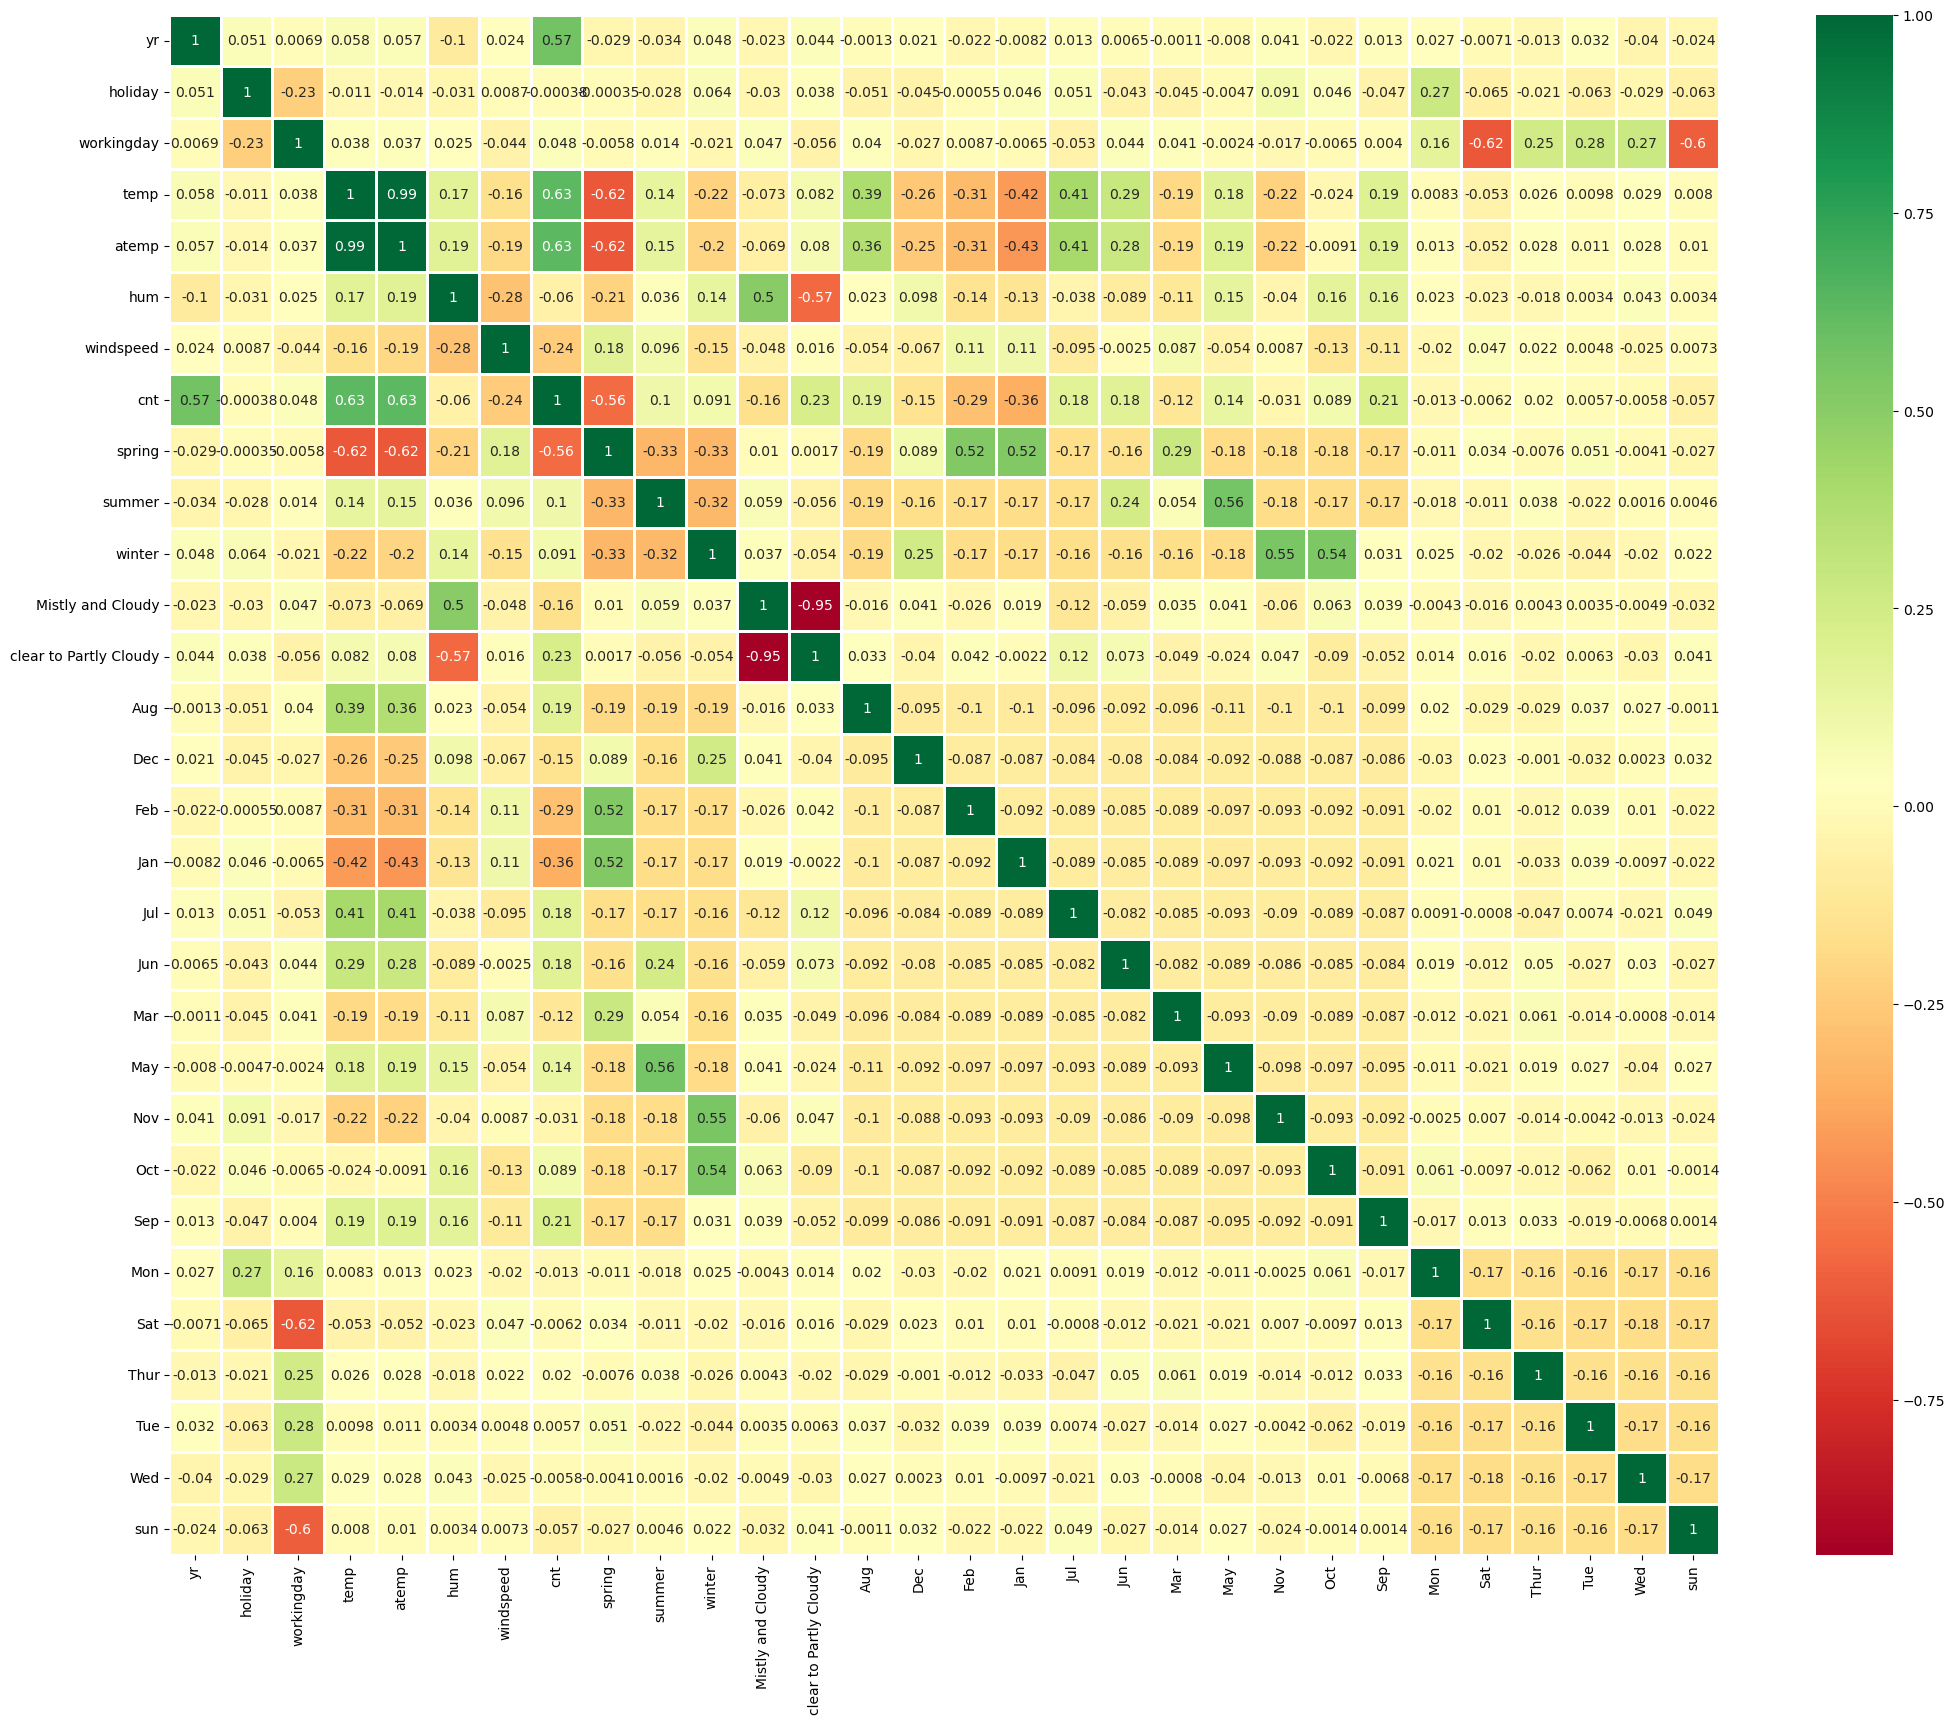

In [52]:
plt.figure(figsize=(25,20))

ax= sns.heatmap(bike_train.corr(), annot=True, cmap="RdYlGn",linewidth =1)
plt.show()

#### Obersvations:
There is multi-colinearity between the variables. We need to consider the factors when developing the model.

- temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables
- workingday variable has high negative correlation with Sat & Sun (where workingday =0)
- Spring is negatively correlated with cnt
- temp, atemp and yr has strong correlation with cnt
- misty weather and humidity has correlation
- various months and corresponding weather has correlation

## Step 5: Building the Linear Model

### 5.1 Dividing into X_train and y_train

In [53]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### 5.2 RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [54]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)  # running RFE
rfe= rfe.fit(X_train,y_train)

In [55]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('Mistly and Cloudy', True, 1),
 ('clear to Partly Cloudy', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 8),
 ('Jan', False, 7),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 2),
 ('May', False, 5),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Thur', False, 14),
 ('Tue', False, 10),
 ('Wed', False, 15),
 ('sun', True, 1)]

In [56]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'Mistly and Cloudy', 'clear to Partly Cloudy',
       'Jul', 'Sep', 'Sat', 'sun'],
      dtype='object')

In [57]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thur', 'Tue', 'Wed'],
      dtype='object')

In [58]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe=X_train[col]

### 5.3 Manual Model Development using statsmodel

In [59]:
#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### 5.3.1 Model 1


In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,94.21
3,temp,53.27
4,atemp,51.60
13,Sat,21.63
14,sun,20.67
10,clear to Partly Cloudy,11.51
9,Mistly and Cloudy,10.07
1,holiday,4.34
7,spring,2.62
5,hum,1.91


In [69]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          1.30e-182
Time:                        18:28:30   Log-Likelihood:                 497.27
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     495   BIC:                            -901.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0705      0.039      1.804      0.072      -0.006       0.147
yr                         0.2275      0.008     27.263      0.000       0.211       0.244
holiday                   -0.0118      0.024     -0.490      0.624      -0.059       0.035
workingday                 0.0358      0.012      3.020      0.003       0.012       0.059
temp                       0.3247      0.131      2.470      0.014       0.066       0.583
atemp                      0.1676      0.138      1.214      0.225      -0.104       0.439
hum                       -0.1849      0.038     -4.874      0.000      -0.259      -0.110
windspeed                 -0.1830      0.028     -6.424      0.000      -0.239      -0.127
spring                    -0.1123      0.015     -7.329      0.000      -0.142      -0.082
winter                     0.0540      0.013      4.216      0.000       0.029       0.079
Mistly and Cloudy          0.2123      0.027      7.745      0.000       0.158       0.266
clear to Partly Cloudy     0.2548      0.029      8.836      0.000       0.198       0.312
Jul                       -0.0557      0.017     -3.198      0.001      -0.090      -0.021
Sep                        0.0663      0.016      4.230      0.000       0.036       0.097
Sat                        0.0491      0.014      3.524      0.000       0.022       0.076
sun                       -0.0025      0.014     -0.175      0.861      -0.031       0.026
==============================================================================
Omnibus:                       68.531   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.112
Skew:                          -0.699   Prob(JB):                     8.50e-37
Kurtosis:                       5.422   Cond. No.                     1.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.19e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Observations: 
Both temp and atemp has high VIF but atemp has high p-value additionally. We will go ahead with dropping atemp from the equation

## 5.3.2 Model 2

In [70]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,workingday,94.12
12,Sat,21.60
13,sun,20.65
9,clear to Partly Cloudy,11.49
8,Mistly and Cloudy,10.06
1,holiday,4.34
3,temp,3.02
6,spring,2.62
4,hum,1.91
7,winter,1.78


In [71]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          1.30e-182
Time:                        18:28:32   Log-Likelihood:                 497.27
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     495   BIC:                            -901.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0705      0.039      1.804      0.072      -0.006       0.147
yr                         0.2275      0.008     27.263      0.000       0.211       0.244
holiday                   -0.0118      0.024     -0.490      0.624      -0.059       0.035
workingday                 0.0358      0.012      3.020      0.003       0.012       0.059
temp                       0.3247      0.131      2.470      0.014       0.066       0.583
atemp                      0.1676      0.138      1.214      0.225      -0.104       0.439
hum                       -0.1849      0.038     -4.874      0.000      -0.259      -0.110
windspeed                 -0.1830      0.028     -6.424      0.000      -0.239      -0.127
spring                    -0.1123      0.015     -7.329      0.000      -0.142      -0.082
winter                     0.0540      0.013      4.216      0.000       0.029       0.079
Mistly and Cloudy          0.2123      0.027      7.745      0.000       0.158       0.266
clear to Partly Cloudy     0.2548      0.029      8.836      0.000       0.198       0.312
Jul                       -0.0557      0.017     -3.198      0.001      -0.090      -0.021
Sep                        0.0663      0.016      4.230      0.000       0.036       0.097
Sat                        0.0491      0.014      3.524      0.000       0.022       0.076
sun                       -0.0025      0.014     -0.175      0.861      -0.031       0.026
==============================================================================
Omnibus:                       68.531   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.112
Skew:                          -0.699   Prob(JB):                     8.50e-37
Kurtosis:                       5.422   Cond. No.                     1.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.19e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 5.3.2 Model 3

 As workingday has the highest VIF value, we will remove the variable next

In [72]:
X_train_new = X_train_new.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,20.47
2,temp,18.58
8,clear to Partly Cloudy,13.86
7,Mistly and Cloudy,9.04
4,windspeed,5.24
5,spring,3.14
6,winter,2.20
0,yr,2.06
9,Jul,1.41
11,Sat,1.23


In [73]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          1.92e-183
Time:                        18:28:44   Log-Likelihood:                 496.51
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     496   BIC:                            -905.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1081      0.048      2.246      0.025       0.014       0.203
yr                         0.2275      0.008     27.253      0.000       0.211       0.244
holiday                   -0.0485      0.027     -1.770      0.077      -0.102       0.005
temp                       0.4798      0.031     15.326      0.000       0.418       0.541
hum                       -0.1824      0.038     -4.815      0.000      -0.257      -0.108
windspeed                 -0.1889      0.028     -6.727      0.000      -0.244      -0.134
spring                    -0.1125      0.015     -7.337      0.000      -0.143      -0.082
winter                     0.0552      0.013      4.314      0.000       0.030       0.080
Mistly and Cloudy          0.2132      0.027      7.777      0.000       0.159       0.267
clear to Partly Cloudy     0.2561      0.029      8.881      0.000       0.199       0.313
Jul                       -0.0559      0.017     -3.205      0.001      -0.090      -0.022
Sep                        0.0653      0.016      4.168      0.000       0.035       0.096
Sat                        0.0135      0.012      1.149      0.251      -0.010       0.037
sun                       -0.0381      0.012     -3.159      0.002      -0.062      -0.014
==============================================================================
Omnibus:                       66.803   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.871
Skew:                          -0.682   Prob(JB):                     7.08e-36
Kurtosis:                       5.399   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Obersvations: 
Next we will remove hum as it has high VIF

In [74]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,13.14
7,clear to Partly Cloudy,13.06
6,Mistly and Cloudy,7.19
3,windspeed,5.22
4,spring,2.77
0,yr,2.05
5,winter,1.81
8,Jul,1.39
10,Sat,1.23
11,sun,1.22


In [75]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.1
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          1.06e-179
Time:                        18:29:13   Log-Likelihood:                 484.87
No. Observations:                 510   AIC:                            -943.7
Df Residuals:                     497   BIC:                            -888.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0485      0.036     -1.336      0.182      -0.120       0.023
yr                         0.2320      0.008     27.372      0.000       0.215       0.249
holiday                   -0.0491      0.028     -1.750      0.081      -0.104       0.006
temp                       0.4493      0.031     14.339      0.000       0.388       0.511
windspeed                 -0.1496      0.027     -5.448      0.000      -0.204      -0.096
spring                    -0.1142      0.016     -7.290      0.000      -0.145      -0.083
winter                     0.0470      0.013      3.628      0.000       0.022       0.072
Mistly and Cloudy          0.2364      0.028      8.570      0.000       0.182       0.291
clear to Partly Cloudy     0.3097      0.027     11.388      0.000       0.256       0.363
Jul                       -0.0485      0.018     -2.731      0.007      -0.083      -0.014
Sep                        0.0600      0.016      3.758      0.000       0.029       0.091
Sat                        0.0123      0.012      1.027      0.305      -0.011       0.036
sun                       -0.0406      0.012     -3.295      0.001      -0.065      -0.016
==============================================================================
Omnibus:                       65.814   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.057
Skew:                          -0.680   Prob(JB):                     1.30e-34
Kurtosis:                       5.344   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5.3.5 Model 5

#### Obersvations:
Next we will remove clear to Partly Cloudy as it has high VIF

In [76]:
X_train_new = X_train_new.drop(['clear to Partly Cloudy'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.10
3,windspeed,4.80
0,yr,2.03
4,spring,1.75
6,Mistly and Cloudy,1.50
5,winter,1.39
7,Jul,1.37
9,Sat,1.21
10,sun,1.20
8,Sep,1.19


In [78]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.6
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          6.48e-156
Time:                        18:29:43   Log-Likelihood:                 425.75
No. Observations:                 510   AIC:                            -827.5
Df Residuals:                     498   BIC:                            -776.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2458      0.029      8.612      0.000       0.190       0.302
yr                    0.2387      0.009     25.162      0.000       0.220       0.257
holiday              -0.0386      0.031     -1.227      0.220      -0.100       0.023
temp                  0.4683      0.035     13.340      0.000       0.399       0.537
windspeed            -0.1838      0.031     -6.001      0.000      -0.244      -0.124
spring               -0.1047      0.018     -5.970      0.000      -0.139      -0.070
winter                0.0426      0.015      2.936      0.003       0.014       0.071
Mistly and Cloudy    -0.0608      0.010     -6.062      0.000      -0.080      -0.041
Jul                  -0.0547      0.020     -2.750      0.006      -0.094      -0.016
Sep                   0.0489      0.018      2.734      0.006       0.014       0.084
Sat                   0.0148      0.013      1.101      0.272      -0.012       0.041
sun                  -0.0342      0.014     -2.478      0.014      -0.061      -0.007
==============================================================================
Omnibus:                      135.591   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.824
Skew:                          -1.212   Prob(JB):                     2.84e-99
Kurtosis:                       6.934   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5.3.6 Model 6

#### Obersvations:
let's remove Sat due to high p-value

In [79]:
X_train_new = X_train_new.drop(['Sat'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.07
3,windspeed,4.74
0,yr,2.03
4,spring,1.74
6,Mistly and Cloudy,1.50
5,winter,1.39
7,Jul,1.37
8,Sep,1.19
9,sun,1.17
1,holiday,1.04


In [80]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     176.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          8.68e-157
Time:                        18:29:51   Log-Likelihood:                 425.13
No. Observations:                 510   AIC:                            -828.3
Df Residuals:                     499   BIC:                            -781.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2496      0.028      8.808      0.000       0.194       0.305
yr                    0.2387      0.009     25.153      0.000       0.220       0.257
holiday              -0.0413      0.031     -1.317      0.189      -0.103       0.020
temp                  0.4657      0.035     13.294      0.000       0.397       0.535
windspeed            -0.1824      0.031     -5.960      0.000      -0.243      -0.122
spring               -0.1053      0.018     -6.001      0.000      -0.140      -0.071
winter                0.0422      0.015      2.906      0.004       0.014       0.071
Mistly and Cloudy    -0.0611      0.010     -6.090      0.000      -0.081      -0.041
Jul                  -0.0538      0.020     -2.704      0.007      -0.093      -0.015
Sep                   0.0495      0.018      2.771      0.006       0.014       0.085
sun                  -0.0369      0.014     -2.718      0.007      -0.064      -0.010
==============================================================================
Omnibus:                      133.332   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.551
Skew:                          -1.180   Prob(JB):                    1.62e-100
Kurtosis:                       7.007   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5.3.7 Model 7

#### Obersvations:
remove holiday due to high p-value

In [81]:
X_train_new = X_train_new.drop(['holiday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.07
2,windspeed,4.74
0,yr,2.03
3,spring,1.73
5,Mistly and Cloudy,1.50
4,winter,1.38
6,Jul,1.37
7,Sep,1.19
8,sun,1.16


In [82]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear regression model obtained
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     195.6
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          1.43e-157
Time:                        18:30:05   Log-Likelihood:                 424.24
No. Observations:                 510   AIC:                            -828.5
Df Residuals:                     500   BIC:                            -786.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2497      0.028      8.803      0.000       0.194       0.305
yr                    0.2381      0.009     25.101      0.000       0.219       0.257
temp                  0.4653      0.035     13.273      0.000       0.396       0.534
windspeed            -0.1832      0.031     -5.980      0.000      -0.243      -0.123
spring               -0.1059      0.018     -6.032      0.000      -0.140      -0.071
winter                0.0408      0.014      2.815      0.005       0.012       0.069
Mistly and Cloudy    -0.0607      0.010     -6.055      0.000      -0.080      -0.041
Jul                  -0.0553      0.020     -2.784      0.006      -0.094      -0.016
Sep                   0.0504      0.018      2.818      0.005       0.015       0.085
sun                  -0.0357      0.014     -2.634      0.009      -0.062      -0.009
==============================================================================
Omnibus:                      134.724   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.719
Skew:                          -1.193   Prob(JB):                    1.22e-101
Kurtosis:                       7.022   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Checking the parameters obtained
lr7.params

const                0.249661
yr                   0.238116
temp                 0.465334
windspeed           -0.183150
spring              -0.105866
winter               0.040806
Mistly and Cloudy   -0.060738
Jul                 -0.055299
Sep                  0.050373
sun                 -0.035723
dtype: float64

#### Obersvatiobs: 

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)

## Step 6: Final Model Interpretation

### Hypothesis Testing :



#### Observations:
From the lr7 model summary, it is evident that all our coefficients are not equal to zero, which means we REJECT the NULL HYPOTHESIS

### F-Staitsics :

F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.

F-Statistics : 195.6
Prob (F-statistic): 1.43e-157


#### Obersvations:

The F-Statistics value of 195.6 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

#### The equation of best fitted surface based on model lr10:
cnt=0.292933 + (0.241269 x yr) + (0.428287 x temp) - (0.205352 x windspeed) − (0.135662 x spring) - (0.059639 x Mistly and Cloudy) - (0.068979 x Jul) + (0.050373 x Sep) - (0.035723 x sun)

#### Interpretation of coefficients :

- const : The Constant value of ‘0.292933’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.292933 units
- yr : A coefficient value of ‘0.241269’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.241269 units
- temp : A coefficient value of ‘0.428287’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.428287 units
- windspeed : A coefficient value of ‘-0.205352’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.205352 units
- Mistly and Cloudy : A coefficient value of ‘-0.059639’ indicated that a unit increase in W2_Summer variable decreases the bike hire numbers by 0.059639 units
- Jul : A coefficient value of ‘-0.068979’ indicated that a unit increase in Sep variable increases the bike hire numbers by 0.068979 units
- Sep : A coefficient value of ‘0.050373’ indicated that a unit increase in Sep variable increases the bike hire numbers by 0.050373 units
- sun: A coefficient value of ‘ -0.035723’ indicated that a unit increase in Sep variable increases the bike hire numbers by  0.035723 units

## Step 7: Model Validation
Validating the assumption of Linear Regression Model :

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals
- Normality of Errors

## 7.1 Linear Relationship

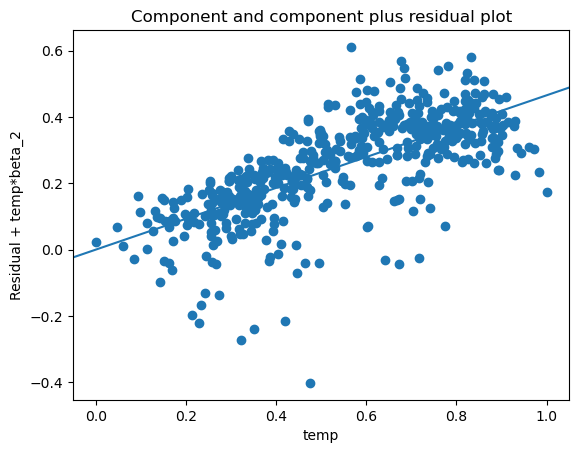

In [85]:
sm.graphics.plot_ccpr(lr7, 'temp')
plt.show()

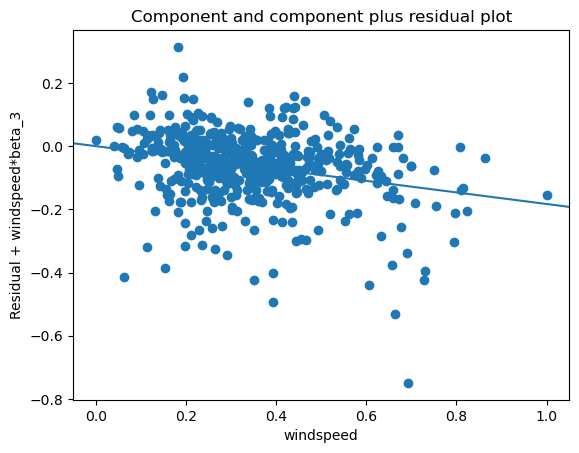

In [86]:
sm.graphics.plot_ccpr(lr7, 'windspeed')
plt.show()

#### Observation:

The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

### 7.2 Homoscedasticity

In [90]:
X_train_lm7

,const,yr,temp,windspeed,spring,winter,Mistly and Cloudy,Jul,Sep,sun
650,1.0,1,0.416433,0.255118,0,1,0,0,0,0
212,1.0,0,0.887856,0.276919,0,0,0,0,0,0
714,1.0,1,0.378013,0.161523,0,1,1,0,0,1
8,1.0,0,0.098690,0.700017,1,0,0,0,0,1
502,1.0,1,0.629300,0.235894,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
444,1.0,1,0.588804,0.138467,0,0,1,0,0,0
46,1.0,0,0.322889,0.472919,1,0,0,0,0,0
374,1.0,1,0.310971,0.340487,1,0,0,0,0,0
366,1.0,1,0.266546,0.633460,1,0,0,0,0,0


In [91]:
y_train

650    0.815347
212    0.488265
714    0.433042
8      0.092039
502    0.876323
         ...   
444    0.714220
46     0.240796
374    0.411413
366    0.221928
419    0.398642
Name: cnt, Length: 510, dtype: float64

In [94]:
y_train_pred = lr7.predict(X_train_lm7)
residual = y_train - y_train_pred

residual

650    0.139709
212   -0.123828
714   -0.145400
8      0.066251
502    0.138915
         ...   
444    0.038551
46     0.033365
374   -0.052844
366   -0.167998
419   -0.043281
Length: 510, dtype: float64

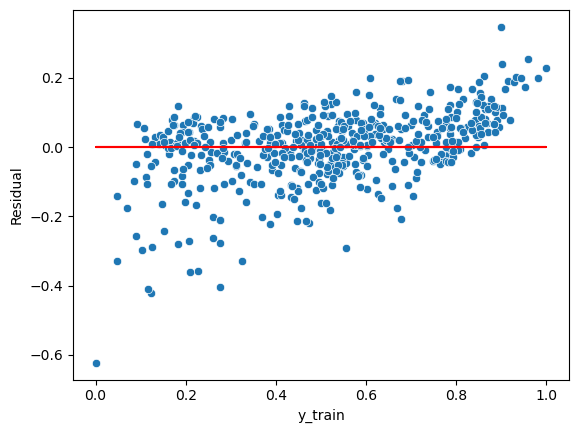

In [95]:
# Create the scatterplot of y_train against residuals
sns.scatterplot(x=y_train, y=residual)

# Overlay the zero-residual line
plt.plot(y_train, [0] * len(y_train), '-r')

# Label the axes
plt.xlabel('y_train')
plt.ylabel('Residual')

# Display the plot
plt.show()

### 7.3 Absence of Multicolinearity

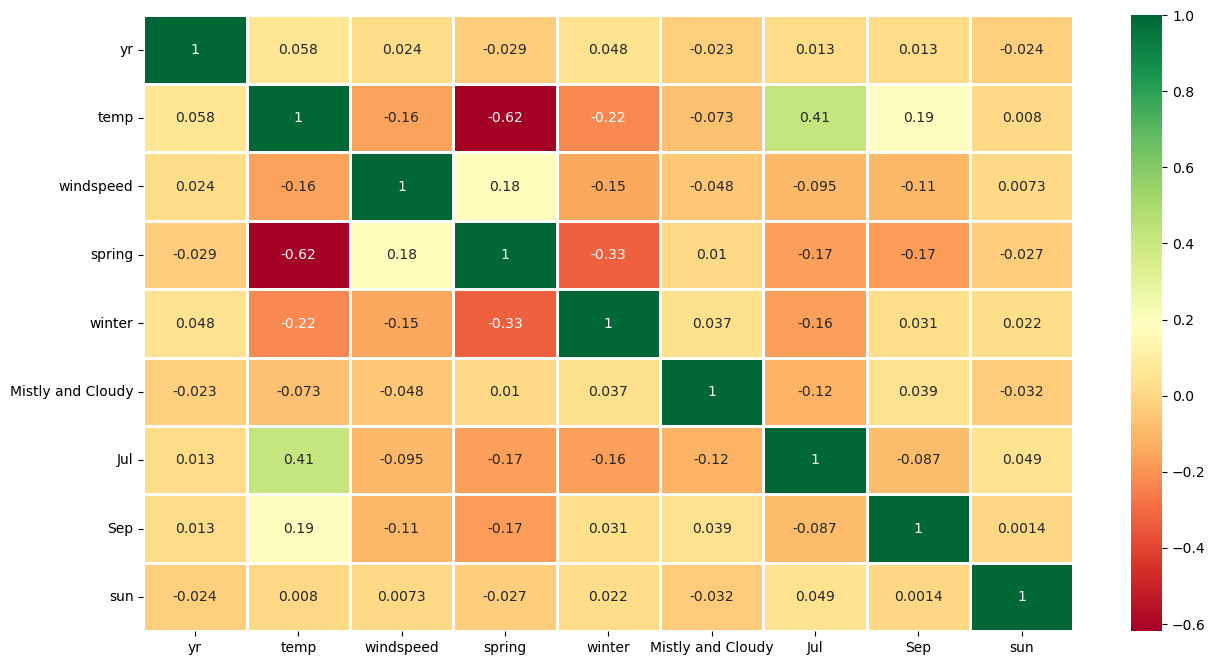

In [96]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [97]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.07
2,windspeed,4.74
0,yr,2.03
3,spring,1.73
5,Mistly and Cloudy,1.50
4,winter,1.38
6,Jul,1.37
7,Sep,1.19
8,sun,1.16


#### Observation: 
All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

### 7.4 Independence of residuals
Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.

0 – 2: positive auto-correlation
2 – 4: negative auto-correlation)

In [98]:
print('The Durbin-Watson value for Final Model lr 10 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 10 is 1.9287


#### Oberservations:
There is almost no autocorrelation.

### 7.5 Normality of error


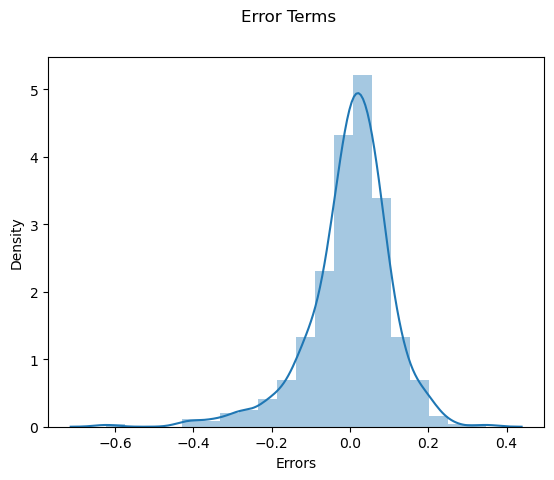

In [99]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

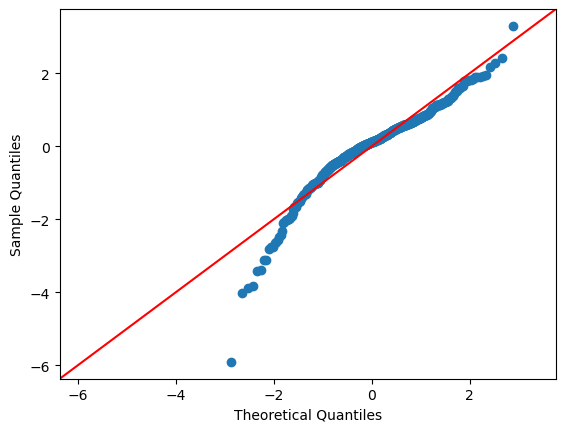

In [100]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### Obeservation: 
Based on the histogram, we can conclude that error terms are following a normal distribution

## Step 8: Making Predictions using final model


### 8.1 Scaling bike_test dataframe
Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset.

In [101]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Thur,Tue,Wed,sun
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,0,0,0,1
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,1,0,0,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,0,0,0,0,0,1
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,1,0,0,0,0,0,0,0,0,1
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,0,0,0,0,1,0,0


In [102]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Thur,Tue,Wed,sun
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,0.550981,0.527344,0.662328,0.346015,0.519816,0.236364,0.268182,...,0.068182,0.072727,0.086364,0.081818,0.154545,0.127273,0.172727,0.145455,0.118182,0.150000
std,0.501120,0.198531,0.466833,0.228967,0.214959,0.143278,0.159517,0.219880,0.425817,0.444023,...,0.252632,0.260281,0.281541,0.274713,0.362295,0.334038,0.378873,0.353363,0.323559,0.357886
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 8.2 Dividing X_test and y_test

In [103]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [107]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)

X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              220 non-null    float64
 1   yr                 220 non-null    int64  
 2   temp               220 non-null    float64
 3   windspeed          220 non-null    float64
 4   spring             220 non-null    uint8  
 5   winter             220 non-null    uint8  
 6   Mistly and Cloudy  220 non-null    uint8  
 7   Jul                220 non-null    uint8  
 8   Sep                220 non-null    uint8  
 9   sun                220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.9 KB


In [108]:
# Making predictions using the final model (lr6)

y_pred = lr7.predict(X_test_lm7)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

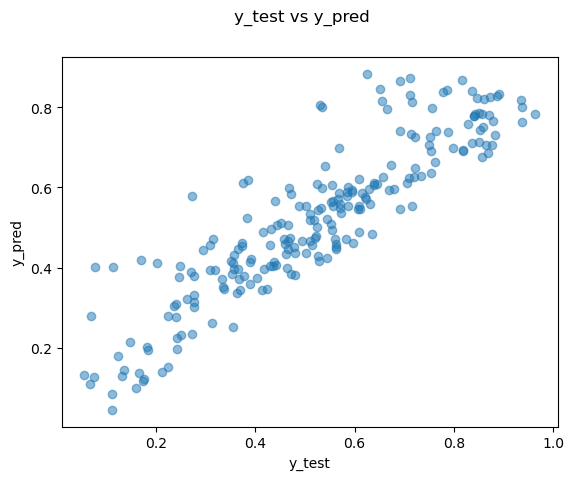

In [109]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

#### R2 Value Calculation for bike_test dataframe

In [110]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8009

#### Adjusted R2 Value Calculation for bike_test dataframe

2adj=1− (1-R2) x (n-1)/(n-p-1)


In [111]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7924

#### Model Train & Test R2 Statsitics Comparison

R2 Value : 0.7994
Adjusted R2 Value: 0.7937

#### Calculating RMSE for the selected Model

In [112]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [113]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0979

#### Calculating Mean Absolute Error for the selected Model

In [114]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0753

#### Obersvation: 
The Root Mean Squared Error value for the test dataset based on final model is 0.093 and Mean Absolute Error is 0.0714, which indicates that the model is really good.

## Model Outcome Summary


- Temperature (Temp)
A coefficient value of ‘0.4283’ indicated that a temperature has significant impact on bike rentals
- windspeed
A coefficient value of ‘-0.2054’ indicated that the light snow and rain deters people from renting out bikes
- Year (yr)
A coefficient value of ‘0.2413’ indicated that a year wise the rental numbers are increasing

It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.
As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.

GitHub: - https://github.com/anwarshaikh042/Bike_Sharing_Assignment.git